In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# data pulled from https://catalog.data.gov/dataset/electric-vehicle-population-size-history-by-county
dataframe = pd.read_csv("Electric_Vehicle_Population_Size_History_By_County.csv")

In [3]:
dataframe.head()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,January 31 2017,Saratoga,NY,Passenger,1,1,2,79,81,2.47
1,December 31 2022,Middlesex,MA,Passenger,2,1,3,63,66,4.55
2,June 30 2017,Fulton,GA,Passenger,1,0,1,115,116,0.86
3,November 30 2021,Arlington,VA,Passenger,1,1,2,130,132,1.52
4,November 30 2019,Ferry,WA,Passenger,5,2,7,4415,4422,0.16


In [4]:
# electric passenger vehicles
passenger_vehicles = dataframe[dataframe['Vehicle Primary Use'] == 'Passenger']

In [5]:
# electric struck vehicles
truck_vehicles = dataframe[dataframe['Vehicle Primary Use'] == 'Truck']

In [6]:
passenger_vehicles[passenger_vehicles['County'] == 'King'].sort_values('Date')

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
10893,April 30 2017,King,WA,Passenger,9556,3882,13438,1378507,1391945,0.97
3236,April 30 2018,King,WA,Passenger,12283,5290,17573,1368376,1385949,1.27
13170,April 30 2019,King,WA,Passenger,18276,6871,25147,1384042,1409189,1.78
3161,April 30 2020,King,WA,Passenger,24083,7695,31778,1385950,1417728,2.24
10121,April 30 2021,King,WA,Passenger,29456,8752,38208,1369387,1407595,2.71
...,...,...,...,...,...,...,...,...,...,...
4957,September 30 2018,King,WA,Passenger,14202,6079,20281,1373935,1394216,1.45
11886,September 30 2019,King,WA,Passenger,20419,7282,27701,1394841,1422542,1.95
10601,September 30 2020,King,WA,Passenger,25386,7894,33280,1371487,1404767,2.37
14801,September 30 2021,King,WA,Passenger,32874,9687,42561,1365422,1407983,3.02


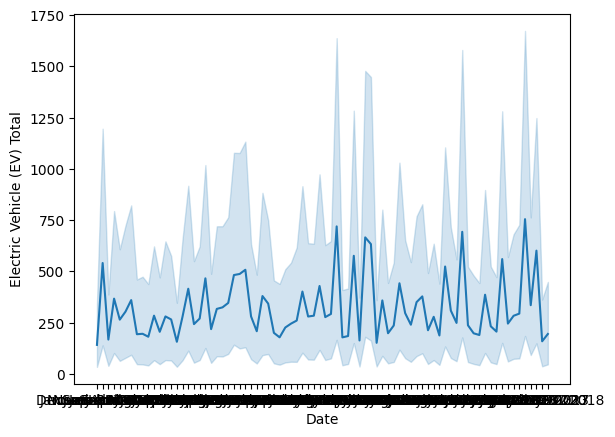

In [7]:
graph1 = sns.lineplot(data=passenger_vehicles, y="Electric Vehicle (EV) Total", x="Date")
# graph1.set_xticklabels(graph1.get_xticklabels(), rotation=90)

In [8]:
# which counties in WA have the most electric vehicles registered in them and physically located in them?
passenger_vehicles_physically_located_in_wa = passenger_vehicles[passenger_vehicles['State'] == 'WA']
total_registrations_by_county = passenger_vehicles_physically_located_in_wa.groupby(['County'])['Electric Vehicle (EV) Total'].sum().reset_index(name = 'Total EVs Registered')
total_registrations_by_county.sort_values('Total EVs Registered', ascending=False)

# top 3 counties by EVs registered
top_3 = total_registrations_by_county.sort_values('Total EVs Registered', ascending=False).head(3)
top_3.style.set_caption("Washington State Counties with Highest Amount of EVs Registered")

,County,Total EVs Registered
16,King,2785506
30,Snohomish,564866
26,Pierce,378634


In [9]:
# lowest 3 counties by EVs registered
lowest_3 = total_registrations_by_county.sort_values('Total EVs Registered', ascending=True).head(3)
lowest_3.style.set_caption("Washington State Counties with Lowest Amount of EVs Registered")

,County,Total EVs Registered
11,Garfield,160
6,Columbia,474
9,Ferry,917


In [10]:
# top 3 dates (months) EVs were registered in King county
passenger_vehicles[passenger_vehicles['County'] == 'King'].nlargest(3, 'Electric Vehicle (EV) Total')

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
16567,August 31 2023,King,WA,Passenger,61754,15166,76920,1296557,1373477,5.60
2740,July 31 2023,King,WA,Passenger,59180,14816,73996,1310060,1384056,5.35
153,June 30 2023,King,WA,Passenger,57391,14609,72000,1317849,1389849,5.18


In [11]:
# top 3 dates (months) EVs were registered in Snohomish county
passenger_vehicles[passenger_vehicles['County'] == 'Snohomish'].nlargest(3, 'Electric Vehicle (EV) Total')

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
4716,August 31 2023,Snohomish,WA,Passenger,13790,3168,16958,514800,531758,3.19
932,July 31 2023,Snohomish,WA,Passenger,13107,3116,16223,521151,537374,3.02
4962,June 30 2023,Snohomish,WA,Passenger,12609,3051,15660,524474,540134,2.90


In [12]:
# top 3 dates (months) EVs were registered in Pierce county
passenger_vehicles[passenger_vehicles['County'] == 'Pierce'].nlargest(3, 'Electric Vehicle (EV) Total')

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
13697,August 31 2023,Pierce,WA,Passenger,8206,2873,11079,516009,527088,2.10
8298,July 31 2023,Pierce,WA,Passenger,7829,2828,10657,522965,533622,2.00
12485,June 30 2023,Pierce,WA,Passenger,7583,2785,10368,526921,537289,1.93


In [13]:
passenger_vehicles_physically_located_in_wa.head()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
4,November 30 2019,Ferry,WA,Passenger,5,2,7,4415,4422,0.16
8,February 28 2018,Benton,WA,Passenger,175,179,354,130449,130803,0.27
9,September 30 2017,Cowlitz,WA,Passenger,52,64,116,70271,70387,0.16
15,October 31 2019,Chelan,WA,Passenger,191,75,266,54651,54917,0.48
24,March 31 2021,Yakima,WA,Passenger,189,135,324,168223,168547,0.19


In [65]:
# predict how many EVs will be registered. Relevant columns are Date, County, and Electric Vehicle (EV) Total
# use linear regression to predict the number of EVs registered in the future
from sklearn.linear_model import LinearRegression

# Independent variables: Date, County
# Dependent variable: Electric Vehicle (EV) Total
X = passenger_vehicles_physically_located_in_wa[['Date', 'County']]
y = passenger_vehicles_physically_located_in_wa['Electric Vehicle (EV) Total']

# convert Date and County to numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Date'] = le.fit_transform(X['Date'])
X['County'] = le.fit_transform(X['County'])

model = LinearRegression().fit(X, y)
model.predict(X)
r_sq = model.score(X, y)

X_new = pd.DataFrame({'Date': ['2025-10-31 00:00:00', '2026-10-31 00:00:00', '2027-09-31 00:00:00'], 'County': ['Garfield', 'King', 'Pierce']})
print(X_new)

X_new['Date'] = le.fit_transform(X_new['Date'])
X_new['County'] = le.fit_transform(X_new['County'])

print(X_new)
y_pred_new = model.predict(X_new)
print(f"y_pred_new: {y_pred_new}")

/tmp/ipykernel_9601/2650980053.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Date'] = le.fit_transform(X['Date'])
/tmp/ipykernel_9601/2650980053.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['County'] = le.fit_transform(X['County'])


ValueError: y should be a 1d array, got an array of shape () instead.